In [143]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import pandas as pd
import numpy as np

import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
print(pd.__version__)

1.4.2


In [145]:
import pickle

infile = open("Preprocessed/mfcc_list_time-series_639450_10_60",'rb')
mfcc_list = pickle.load(infile)
infile.close()

In [146]:
df = pd.read_csv("Data/features_30_sec.csv")
df['labels'] = range(0, 1000)
mfcc_list = mfcc_list.merge(df, on="labels", how="left")

mfcc_list.head()


,mfcc,labels,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,"[[-242.4359893798828, 102.18486022949219, -9.9...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.16585,129774.064525,...,52.42091,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,"[[-185.00997924804688, 107.80894470214844, 9.4...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.16585,129774.064525,...,52.42091,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
2,"[[-187.95018005371094, 87.32178497314453, -25....",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.16585,129774.064525,...,52.42091,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
3,"[[-217.97210693359375, 93.81674194335938, 23.6...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.16585,129774.064525,...,52.42091,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
4,"[[-167.35015869140625, 129.44635009765625, -14...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.16585,129774.064525,...,52.42091,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues


In [167]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mfcc_list['labels'] = le.fit_transform(mfcc_list.label.values)
mfcc_list.head(7000)

,mfcc,labels,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,"[[-242.4359893798828, 102.18486022949219, -9.9...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,"[[-185.00997924804688, 107.80894470214844, 9.4...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
2,"[[-187.95018005371094, 87.32178497314453, -25....",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
3,"[[-217.97210693359375, 93.81674194335938, 23.6...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
4,"[[-167.35015869140625, 129.44635009765625, -14...",0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,"[[-103.22481536865234, 100.77728271484375, -14...",6,metal.00099.wav,661794,0.516337,0.075121,0.170188,0.003762,2375.608157,316916.950223,...,49.329716,-4.962548,32.520592,6.166539,37.861374,0.382762,53.022713,2.700956,34.724773,metal
6996,"[[-104.05938720703125, 105.79164123535156, -25...",6,metal.00099.wav,661794,0.516337,0.075121,0.170188,0.003762,2375.608157,316916.950223,...,49.329716,-4.962548,32.520592,6.166539,37.861374,0.382762,53.022713,2.700956,34.724773,metal
6997,"[[20.339624404907227, 49.16743469238281, 11.55...",6,metal.00099.wav,661794,0.516337,0.075121,0.170188,0.003762,2375.608157,316916.950223,...,49.329716,-4.962548,32.520592,6.166539,37.861374,0.382762,53.022713,2.700956,34.724773,metal
6998,"[[-72.55628967285156, 70.59550476074219, -19.6...",6,metal.00099.wav,661794,0.516337,0.075121,0.170188,0.003762,2375.608157,316916.950223,...,49.329716,-4.962548,32.520592,6.166539,37.861374,0.382762,53.022713,2.700956,34.724773,metal


In [168]:
print(len(mfcc_list))

10000


In [169]:
#convert mfcc column to matrix
def mfcc_dict(df):
    
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    for i in range(len(df)):
        data["mapping"].append(df.label.iloc[i])
        data["labels"].append(df.labels.iloc[i])
        data["mfcc"].append(df.mfcc.iloc[i])
        
    return data

In [170]:
def load_data(data):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z



In [172]:
def prepare_datasets(mfcc_list, test_size,validation_size):
    """Loads data and splits it into train, validation and test sets.
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """
    
    from sklearn.model_selection import train_test_split
        
    #load data
    data = mfcc_dict(mfcc_list)
    X, y, z = load_data(data)
    print(X.shape,y.shape,z.shape)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
#     from keras.utils.np_utils import to_categorical
#     y_test = to_categorical(y_test)
#     y_train = to_categorical(y_train)

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z

In [173]:
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(mfcc_list,0.25,0.2)

(10000, 125, 60) (10000,) (10000,)


In [174]:
print(y_test)

[6 9 7 ... 1 1 3]


In [175]:
def CNN2D(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [176]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In [177]:
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = CNN2D(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 123, 58, 32)       320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 29, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 62, 29, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 27, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 30, 14, 32)       0         
 g2D)                                                            
                                                     

In [178]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
188/188 [==============================] - 35s 179ms/step - loss: 1.9823 - accuracy: 0.3085 - val_loss: 1.5807 - val_accuracy: 0.4433
Epoch 2/30
188/188 [==============================] - 34s 180ms/step - loss: 1.4704 - accuracy: 0.4667 - val_loss: 1.2961 - val_accuracy: 0.5513
Epoch 3/30
188/188 [==============================] - 34s 179ms/step - loss: 1.2653 - accuracy: 0.5420 - val_loss: 1.1801 - val_accuracy: 0.5913
Epoch 4/30
188/188 [==============================] - 28s 151ms/step - loss: 1.0903 - accuracy: 0.6143 - val_loss: 1.1234 - val_accuracy: 0.5967
Epoch 5/30
188/188 [==============================] - 25s 134ms/step - loss: 0.9723 - accuracy: 0.6528 - val_loss: 1.0601 - val_accuracy: 0.6327
Epoch 6/30
188/188 [==============================] - 24s 130ms/step - loss: 0.8725 - accuracy: 0.6957 - val_loss: 1.0121 - val_accuracy: 0.6613
Epoch 7/30
188/188 [==============================] - 24s 128ms/step - loss: 0.7719 - accuracy: 0.7337 - val_loss: 0.9815 - val_ac

In [179]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

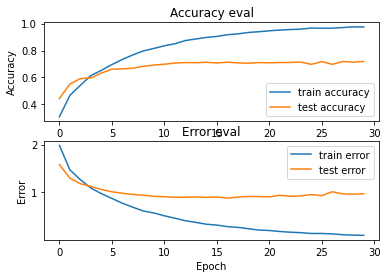

In [180]:
# plot accuracy/error for training and validation
plot_history(history)

In [181]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 2s - loss: 0.9198 - accuracy: 0.7220 - 2s/epoch - 25ms/step

Test accuracy: 0.722000002861023


In [190]:
# pick a sample to predict from the test set
X_to_predict = X_test[200]
y_to_predict = y_test[200]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: blues, Predicted label: ['blues']
